In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\soods\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Fri Jan 31 21:30:23 2025).


In [8]:
df['month'] = df.job_posted_date.dt.month_name()
df['month_num']  = df.job_posted_date.dt.month
#df.sort_values(by='month_num')

In [9]:
df_usa =df[df['job_country'] == "United States"].copy()
df_usa.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills', 'month', 'month_num'],
      dtype='object')

In [10]:
#jt = ['Data Analyst','Data Scientist','Data Engineer']
jt= df_usa.groupby('job_title_short').size().sort_values(ascending=False).head(3)
jt = jt.index.to_list()
jt

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [15]:
#pvt_tab = df_usa.groupby(['job_title_short','month']).size() ------------------ produces a series as output
#pvt_tab

pv_t = df_usa.pivot_table(index= ['month_num','month'], columns= 'job_title_short', aggfunc='size')
pv_t = pv_t.loc[:,jt]


pv_t = pv_t.sort_index(level=0)
#pv_t.index.get_level_values(0)

pv_t.index = pv_t.index.droplevel(0)
#pv_t.set_index('month')  ----------- not reuired as if we delete month_num then month becomes index bydefault 
pv_t

#=========================================================


job_title_short,Data Analyst,Data Scientist,Data Engineer
month,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


<Axes: xlabel='month'>

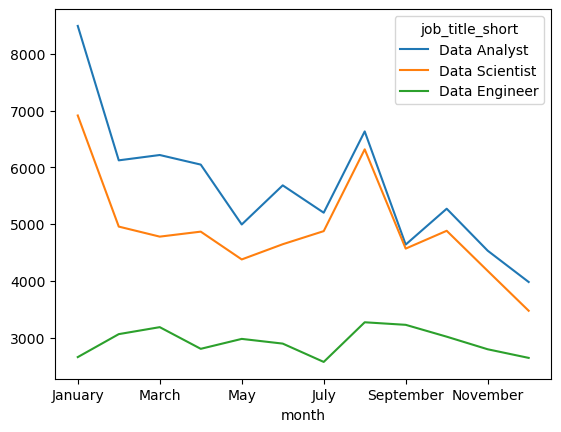

In [16]:
pv_t.plot(kind='line')